<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/35_Data_Set_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount the Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


Problem 1: Learning classification with self-made dataset

In [ ]:
#Batch size, epochs and image size with the height and width
batch_size = 2
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Problem 2: Data expansion for classification dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
gen_train = image_generator.flow_from_directory(batch_size=batch_size,
                                          directory="drive/MyDrive/dataset/",
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 11 images belonging to 2 classes.


In [12]:
train_data, labels = next(gen_train)

In [13]:
import matplotlib.pyplot as plt

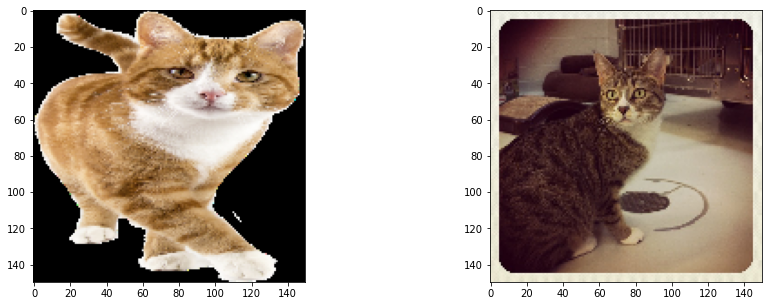

In [14]:
plt.figure(figsize=(15,5))
for i in range(len(train_data)):
    plt.subplot(1, 2, i+1)
    plt.imshow(train_data[i])

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf
from keras import optimizers

In [16]:
#Model building
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
#Compiling the model
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [22]:
model.fit_generator(generator=gen_train, epochs=epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


6/6 [==============================] - 4s 481ms/step - loss: 1.1650 - accuracy: 0.5455
Epoch 2/15
6/6 [==============================] - 1s 189ms/step - loss: 0.5733 - accuracy: 0.5455
Epoch 3/15
6/6 [==============================] - 1s 165ms/step - loss: 0.4260 - accuracy: 0.7273
Epoch 4/15
6/6 [==============================] - 1s 185ms/step - loss: 0.2951 - accuracy: 0.9091
Epoch 5/15
6/6 [==============================] - 1s 164ms/step - loss: 0.2051 - accuracy: 0.9091
Epoch 6/15
6/6 [==============================] - 1s 166ms/step - loss: 0.0882 - accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 1s 162ms/step - loss: 0.0970 - accuracy: 0.9091
Epoch 8/15
6/6 [==============================] - 1s 179ms/step - loss: 0.2464 - accuracy: 0.9091
Epoch 9/15
6/6 [==============================] - 1s 159ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 10/15
6/6 [==============================] - 1s 155ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 11/15
6/6 [=============

Problem 3: Preparation of object detection dataset

In [23]:
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 2,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

In [24]:
def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

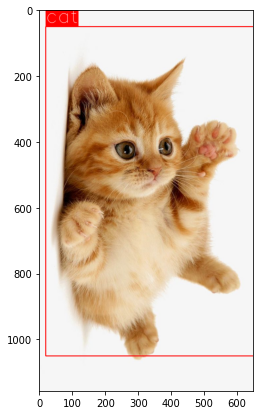

In [26]:
image = download_image('/content/drive/MyDrive/dataset/cat/cat4.jpg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[20,50,1000,1000]], 'category_id': [0]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

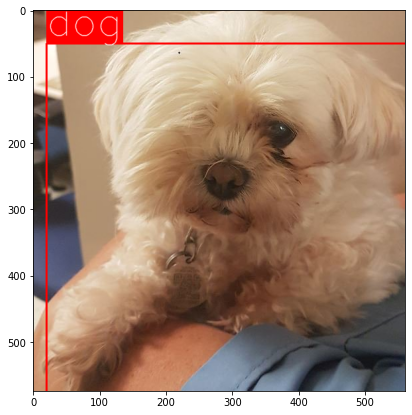

In [27]:
image = download_image('/content/drive/MyDrive/dataset/dog/dog4.jpg')
image = np.array(image)

annotations = {'image': image, 'bboxes': [[20,50,700,700]], 'category_id': [1]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

Problem 4: Data expansion for object detection dataset

In [28]:
import albumentations as A

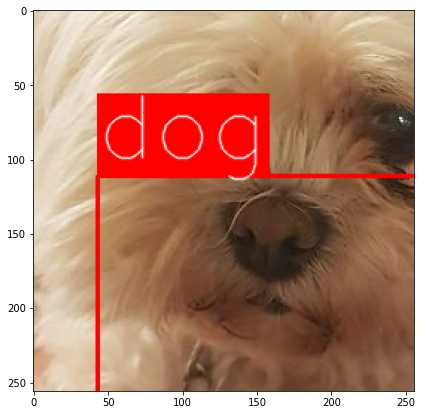

In [31]:
aug = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

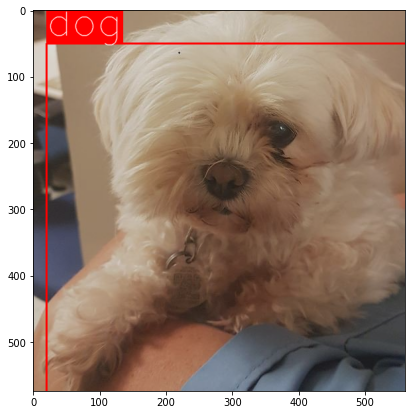

In [30]:
aug = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)